In [1]:
import cc.atlas as atlas
import cc.cartography as cartography

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use( '~/repos/clean-bold/clean-bold.mplstyle' )

# Load Data

In [3]:
fp = '../data/example_atlas/projection.h5'
c = cartography.Cartographer.from_hdf5( fp )

/Users/zhafen/repos/verdict/verdict.py:1404: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if hasattr( a[first_element_index][0], 'decode' ):


# Generate Map

In [4]:
coords, inds, pairs = c.map( 'Hafen2019' )

/Users/zhafen/repos/cc/cc/cartography.py:1179: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos( self.cospsi_matrix )
100%|██████████| 8/8 [00:00<00:00, 3293.52it/s]


# Plot

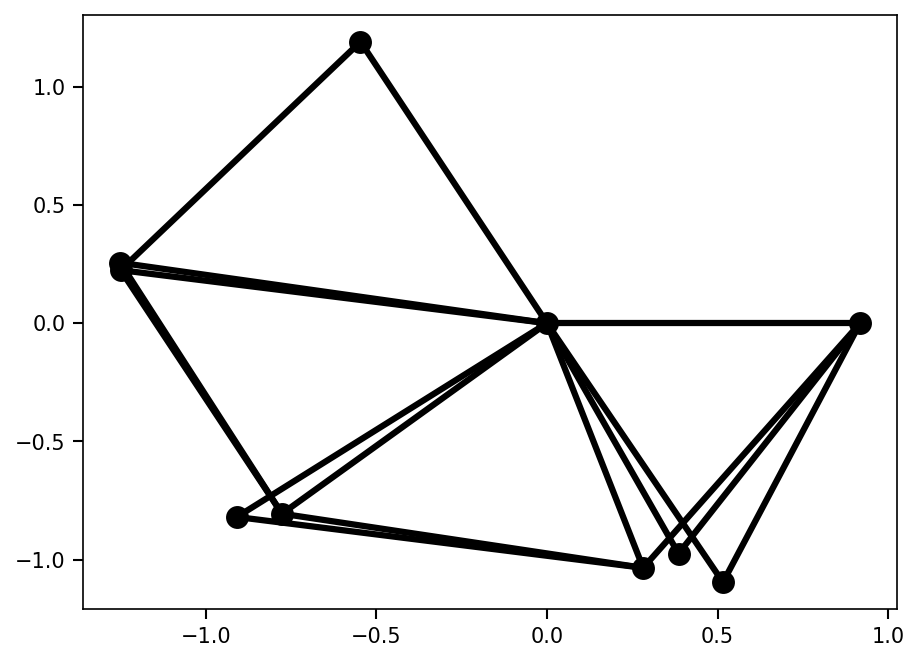

In [5]:
fig = plt.figure()
ax = plt.gca()

ax.scatter(
    coords[:,0],
    coords[:,1],
    color = 'k',
)

for pair in pairs:
    
    ax.plot(
        coords[pair][:,0],
        coords[pair][:,1],
        color = 'k',
    )

# DEBUG

In [6]:
import numpy as np

In [7]:
d_ij = np.linalg.norm( coords - coords[inds[0]], axis=1 )

In [8]:
psi_ij = [ c.psi( c.publications[inds[0]], _, scaling=1. )[0] for _ in c.publications ]

In [9]:
inds

array([8, 9, 6, 7, 5, 3, 1, 4, 2, 0])

In [10]:
d_ij = []
psi_ij = []
for i, j in pairs:
    print( i, j )
    d_ij.append( np.linalg.norm( coords[i] - coords[j] ) )
    psi_ij.append( c.psi( c.publications[i], c.publications[j], scaling=1. )[0] )
np.testing.assert_allclose( sorted( d_ij ), sorted( psi_ij ), )

8 9
6 9
6 8
7 9
7 8
5 7
5 8
3 9
3 8
1 7
1 8
4 5
4 8
2 5
2 8
0 4
0 8


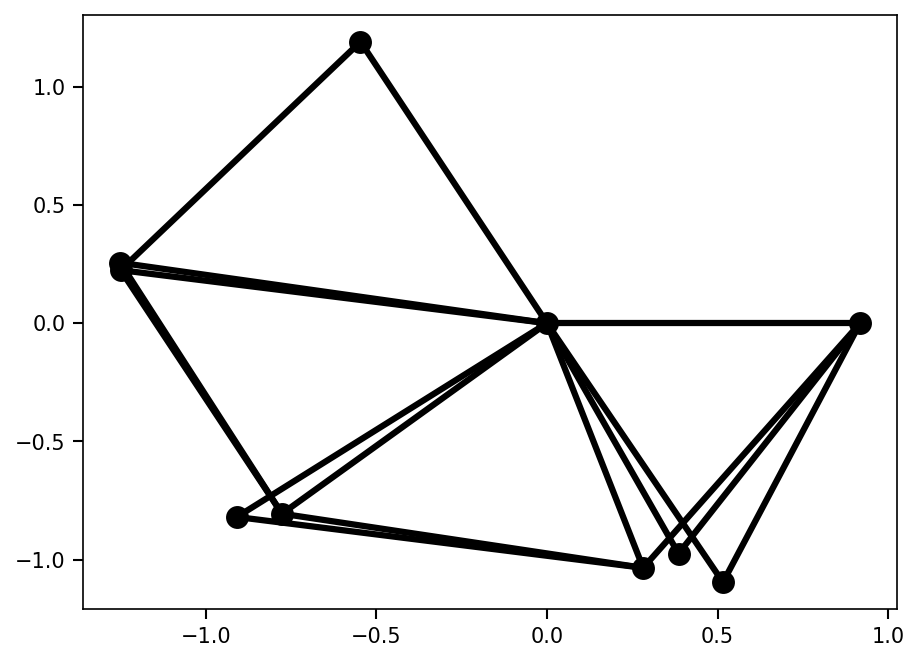

In [11]:
fig = plt.figure()
ax = plt.gca()

ax.scatter(
    coords[:,0],
    coords[:,1],
    color = 'k',
)

for pair in pairs:

    d_pair = np.linalg.norm( coords[pair[0]] - coords[pair[1]] )
    psi_pair = c.psi( c.publications[pair[0]], c.publications[pair[1]], scaling=1. )[0]
    
    ax.plot(
        coords[pair][:,0],
        coords[pair][:,1],
        color = [ 'r', 'k', ][int(np.isclose(psi_pair,d_pair))],
    )